In [1]:
library(ggplot2)
library(reshape2)

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘reshape2’ was built under R version 3.6.2”


## Panel - Bar plot of enrichment results for GR-response tag eSNPs and GWAS SNPs.  AD = Alzheimer’s disease, ADHD=attention-deficit/hyperactivity disorder, AUT=autism spectrum disorders, BP = bipolar disorder, Cross = cross disorder analysis, EA=educational attainment, MDD= major depressive disorder, PTSD= post-traumatic stress disorder, SCZ = schizophrenia, T2D= diabetes type 2, TS= Tourette syndrome.


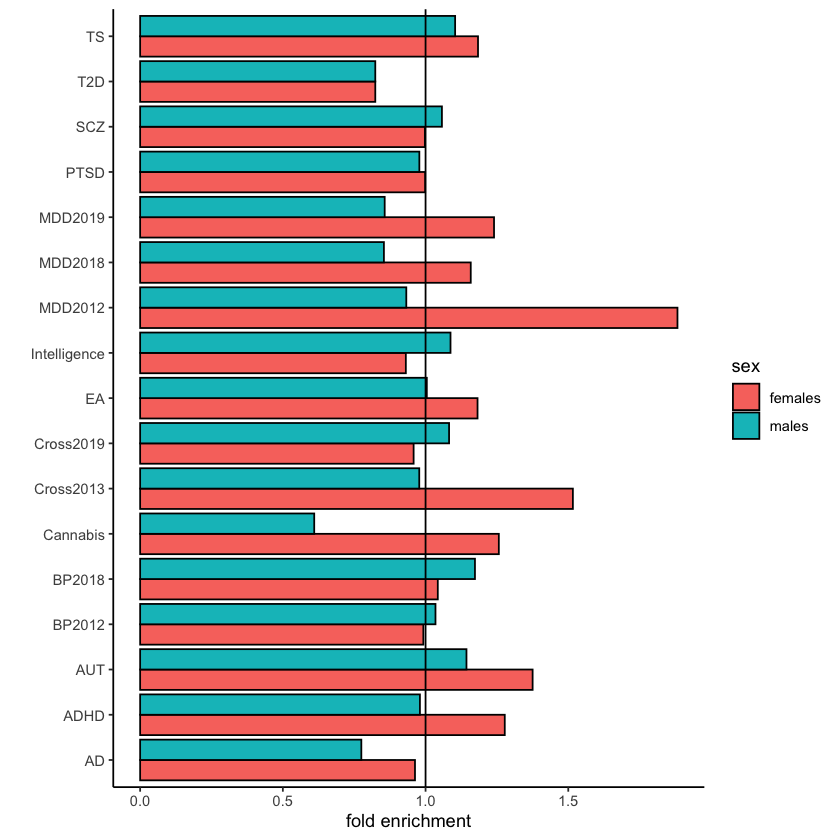

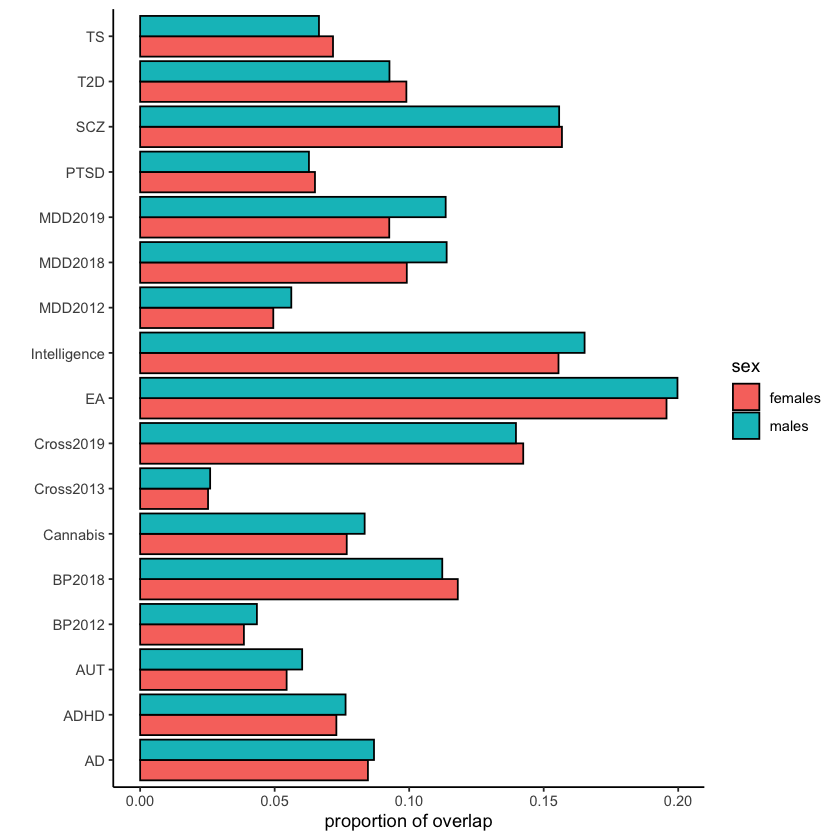

In [4]:
data = read.delim("data/fig4D_PGC_TRPS_results.txt")
data$prop = 0
data[ data$sex=="males",]$prop = data[ data$sex=="males",]$overlap/668
data[ data$sex=="females",]$prop = data[ data$sex=="females",]$overlap/601

#pdf("Figure4E_pgc.pdf")
ggplot(data , aes(x = GWAS, y=or,fill=sex)) +
  geom_bar(stat="identity", colour="black", position=position_dodge())+geom_hline(yintercept = 1)+
  coord_flip()+theme_classic()+ylab("fold enrichment")+xlab("")

ggplot(data , aes(x = GWAS, y=prop,fill=sex)) +
  geom_bar(stat="identity", colour="black", position=position_dodge())+
  coord_flip()+theme_classic()+ylab("proportion of overlap")+xlab("")

#ggplot(data , aes(x = GWAS, y=-log10(pval),fill=sex)) +
#  geom_bar(stat="identity", colour="black", position=position_dodge())+geom_hline(yintercept = -log10(0.05))+
#  coord_flip()+theme_classic()+ylab("enrichment p-value")+xlab("")



## Panel B- Upset plot displaying the overlapping significant sex-stratified GR-response etranscripts with BA25 MDD-related transcripts. 

`geom_smooth()` using formula 'y ~ x'



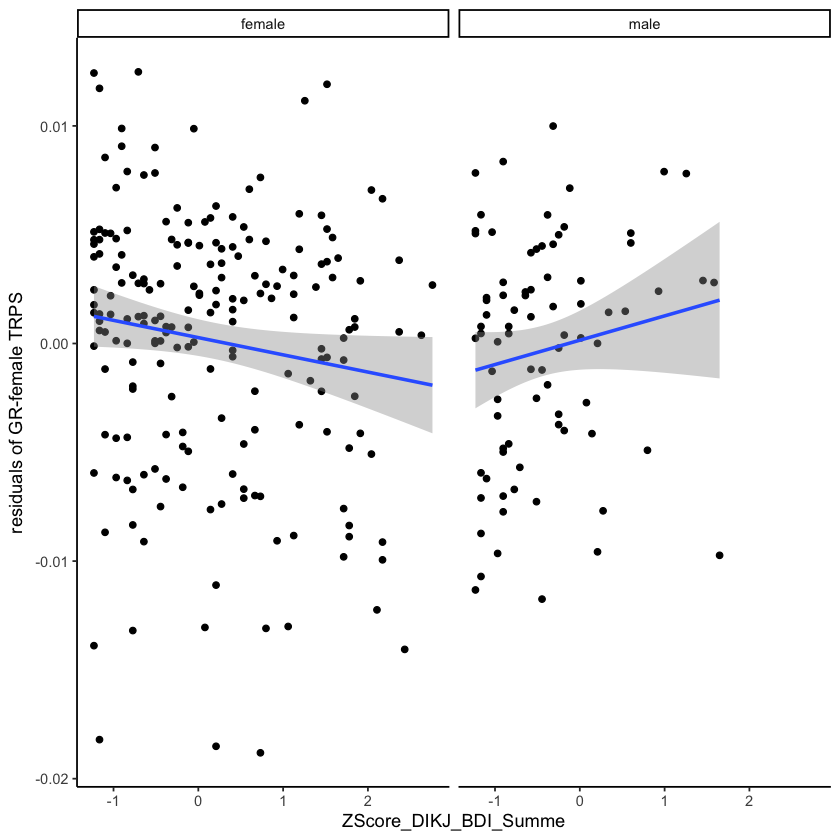

In [8]:
cohort1.zscore <- readRDS("data/fig4C_cohort1_TRPS_Zscore.rds")
cohort1.zscore$sex  = "male"
cohort1.zscore[ cohort1.zscore$FB_K01_J01_Geschl %in% 0,]$sex="female"

qplot(x = ZScore_DIKJ_BDI_Summe  , y = residuals,  facets = ~sex, data = cohort1.zscore ,na.rm = TRUE) +
  geom_smooth(method = "lm")+theme_classic()+ylab("residuals of GR-female TRPS")